# Table of Content

### 1. Importing Libraries
### 2. Loading Data
### 3. Data Wrangling
### 4. Feature Selection using Correlation Matrix
### 5. Feature Selection using SelectKBest Method
### 6. Feature Selection using Extra Tree Classifier
### 7. Feature Engineering with BoxCox, Log, Min-Max and Standard transformation
### 8. Preparing data - Standardisation and Splitting
### 9. Prediction with XGBoost
### 10. Using MultiLayer Perceptrediction

ediction

## 1. Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime as dt

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import XGBRegressor

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from collections import Counter

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

### 2. Loading Data

In [5]:
data = pd.read_csv('SolarPrediction.csv')

In [6]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


### 3. Data Wrangling

In [9]:
df = data.copy()

In [10]:
df['Data'] = df['Data'].apply(lambda x:x.split()[0])
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [11]:
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['Day'] = pd.to_datetime(df['Data']).dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second

df['riseHour'] = pd.to_datetime(df['TimeSunRise']).dt.hour
df['riseMinute'] = pd.to_datetime(df['TimeSunRise']).dt.minute

df['setHour'] = pd.to_datetime(df['TimeSunSet']).dt.hour
df['setMinute'] = pd.to_datetime(df['TimeSunSet']).dt.minute

In [12]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,riseHour,riseMinute,setHour,setMinute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,18,13


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  Month                   32686 non-null  int32  
 12  Day                     32686 non-null  int32  
 13  Hour                    32686 non-null  int32  
 14  Minute                  32686 non-null

In [14]:
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [15]:
df.shape

(32686, 15)

In [16]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,riseHour,riseMinute,setHour,setMinute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


In [17]:
df.isnull().values.sum()

0

In [18]:
input = df.drop(['Radiation'],axis=1)
target = df['Radiation']

### 4.Feature Selection using Correlation Matrix

In [20]:
corr_matrix = df.corr()
corr_matrix

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,riseHour,riseMinute,setHour,setMinute
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
Month,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
Day,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
Hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,NaN,-0.006772,0.008629,-0.007056
Minute,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,NaN,-0.000158,0.001052,-0.002215


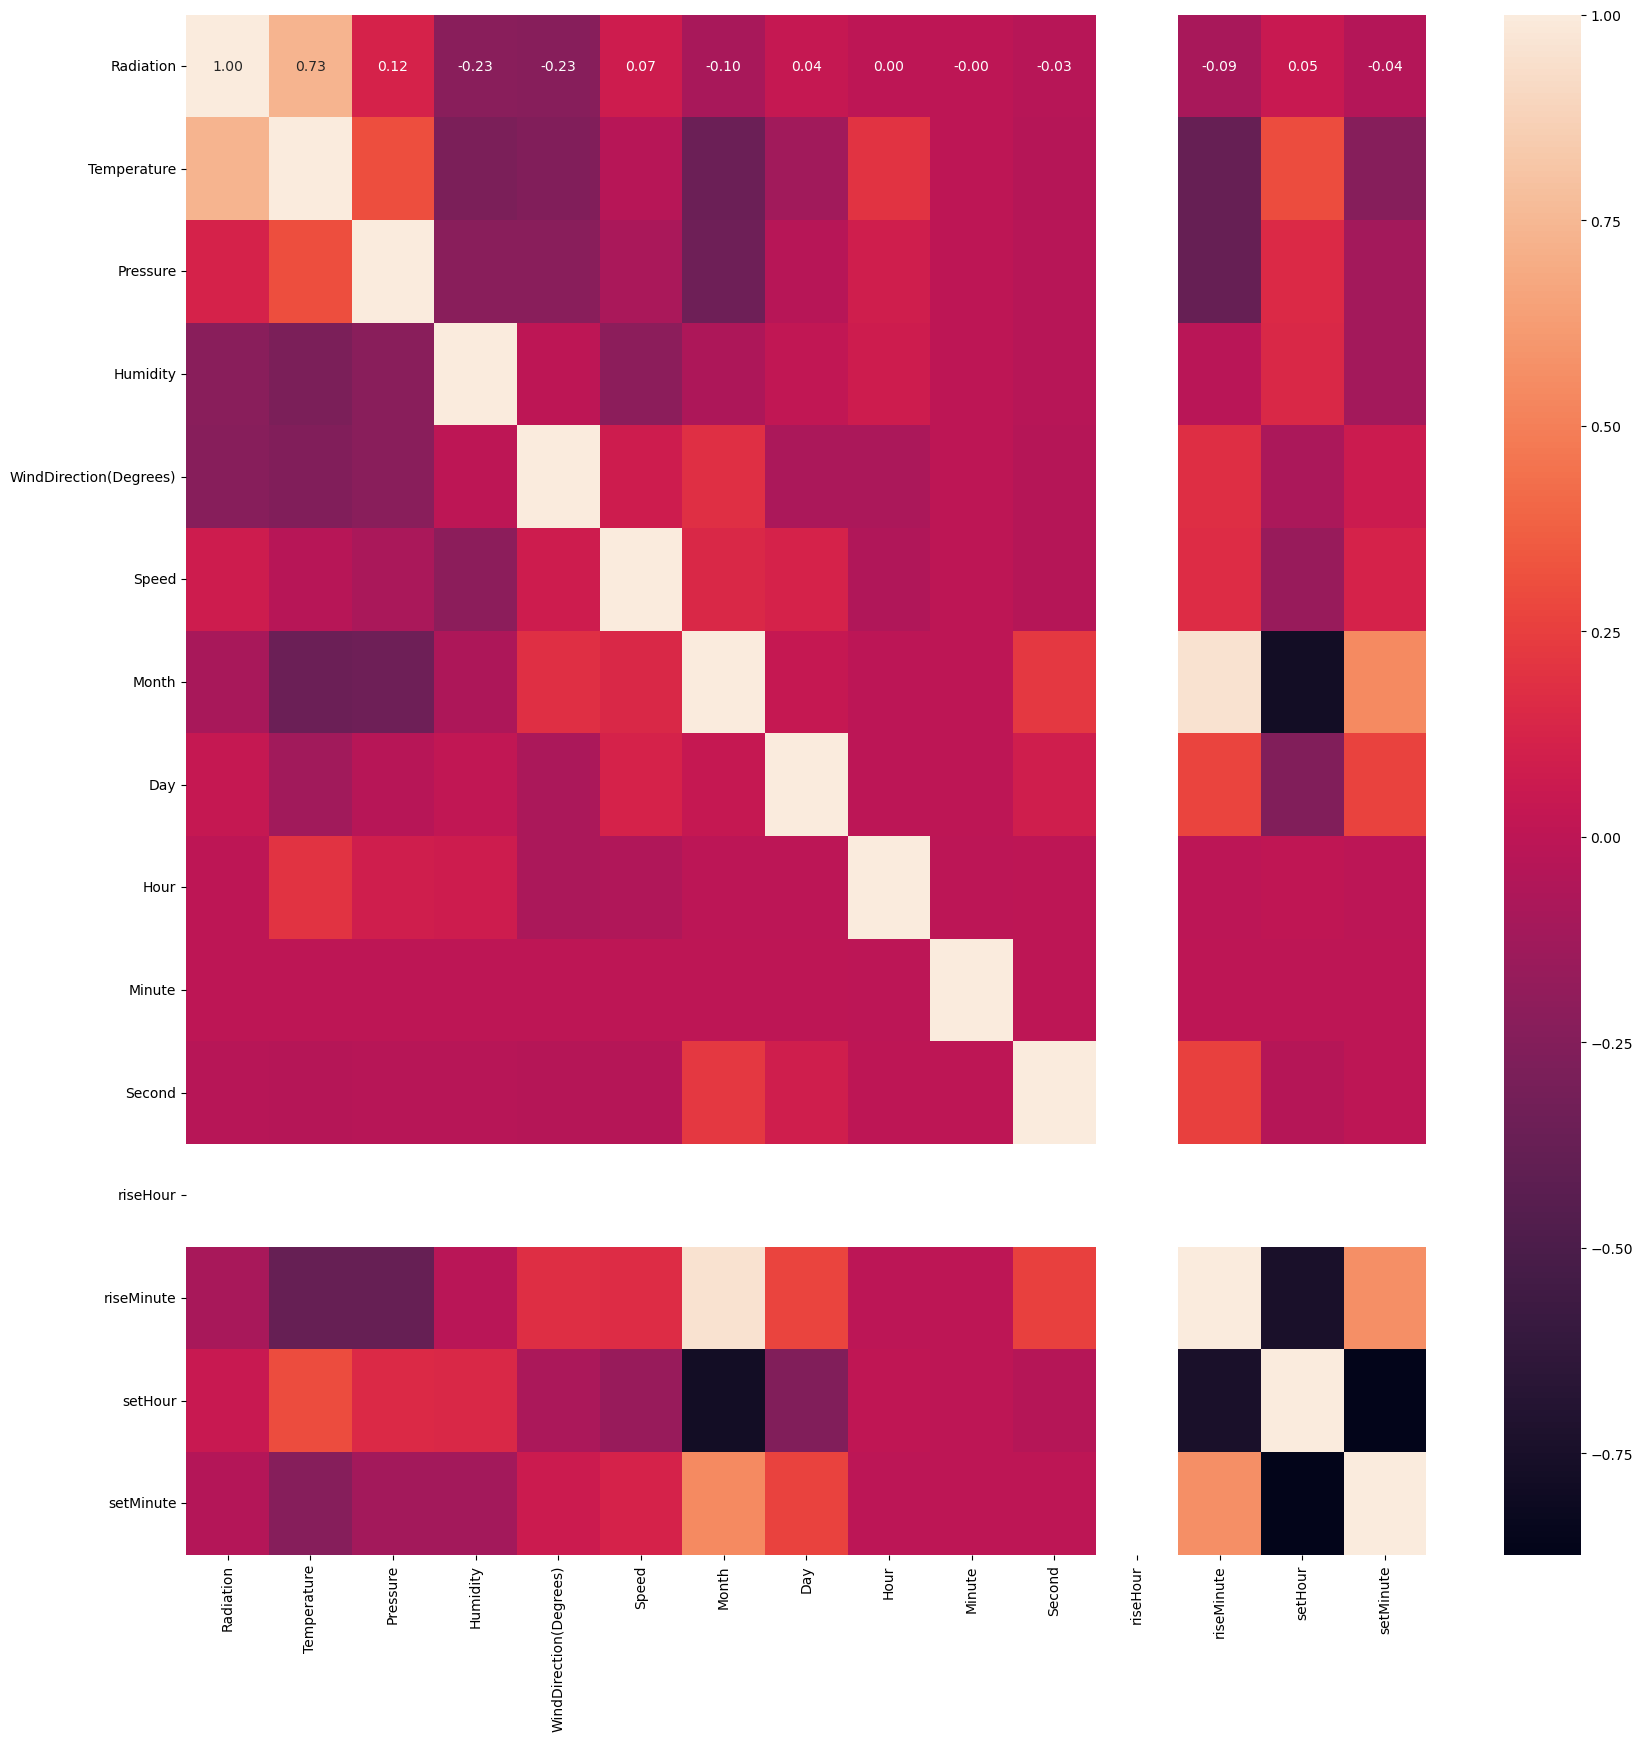

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,fmt='.2f')
plt.show()

### 5. Feature Selection using SelectKBest Method

In [23]:
best_feature = SelectKBest(score_func=chi2, k=10)
## LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(target)

##MinMaxScaler
scaled_feature = MinMaxScaler().fit_transform(input)

## best feature
fit = best_feature.fit(scaled_feature,y_train)


In [24]:
fit.scores_

array([ 1655.51616149,   527.71209526,  1600.06878743,  3294.02655388,
         771.72796028,  4721.2899351 ,  2862.20409866,   702.79493128,
        2728.50734127,  2312.41922434,            nan,  4044.45270959,
       12289.46388698,  1877.27648413])

In [25]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(input.columns)

In [26]:
feature_score = pd.concat([column,scores],axis=1)

In [27]:
feature_score.columns = ['Features','Feature_imp']

In [28]:
feature_score.sort_values(by='Feature_imp',ascending=False,inplace=True)

In [29]:
feature_score

,Features,Feature_imp
12,setHour,12289.463887
5,Month,4721.289935
11,riseMinute,4044.452710
3,WindDirection(Degrees),3294.026554
6,Day,2862.204099
8,Minute,2728.507341
9,Second,2312.419224
13,setMinute,1877.276484
0,Temperature,1655.516161
2,Humidity,1600.068787


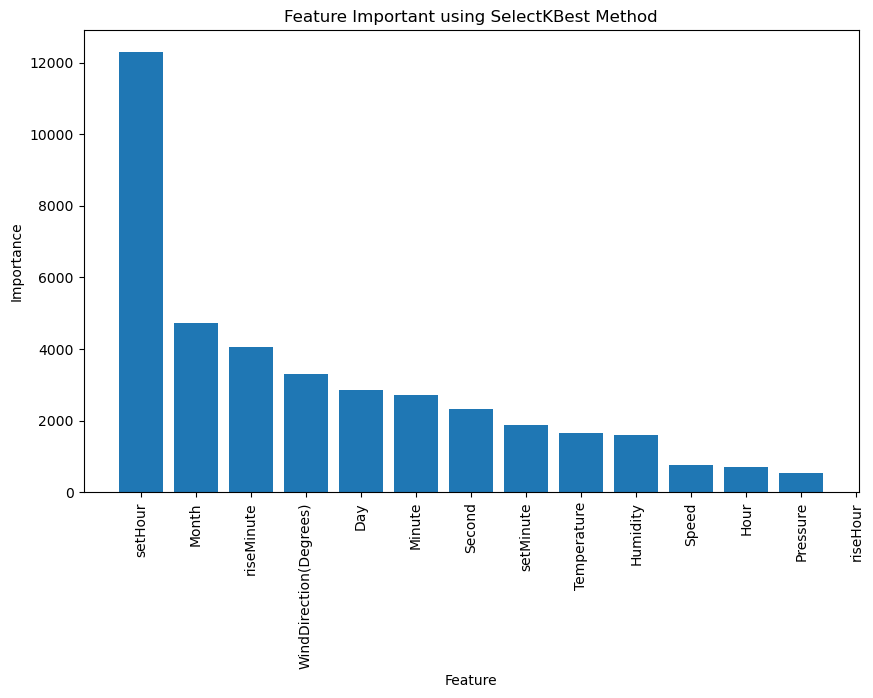

In [30]:
plt.figure(figsize=(10,6))
plt.bar(feature_score['Features'],feature_score['Feature_imp'])
plt.xticks(rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Important using SelectKBest Method')
plt.show()

### 6.Feature Selection using Extra Tree Classifier

In [32]:
model = ExtraTreesClassifier(n_estimators=5, max_depth=10, n_jobs=1,verbose=2)
model.fit(scaled_feature,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


ExtraTreesClassifier(max_depth=10, n_estimators=5, n_jobs=1, verbose=2)

In [33]:
feature_imp = pd.DataFrame(model.feature_importances_,index=input.columns,columns=['feature_imp'])
feature_imp.sort_values(by='feature_imp',ascending=False,inplace=True)
feature_imp

,feature_imp
Temperature,0.220521
Hour,0.139816
WindDirection(Degrees),0.090263
setMinute,0.071694
riseMinute,0.068516
Day,0.066592
Humidity,0.066172
Pressure,0.060509
Month,0.051707
Second,0.049171


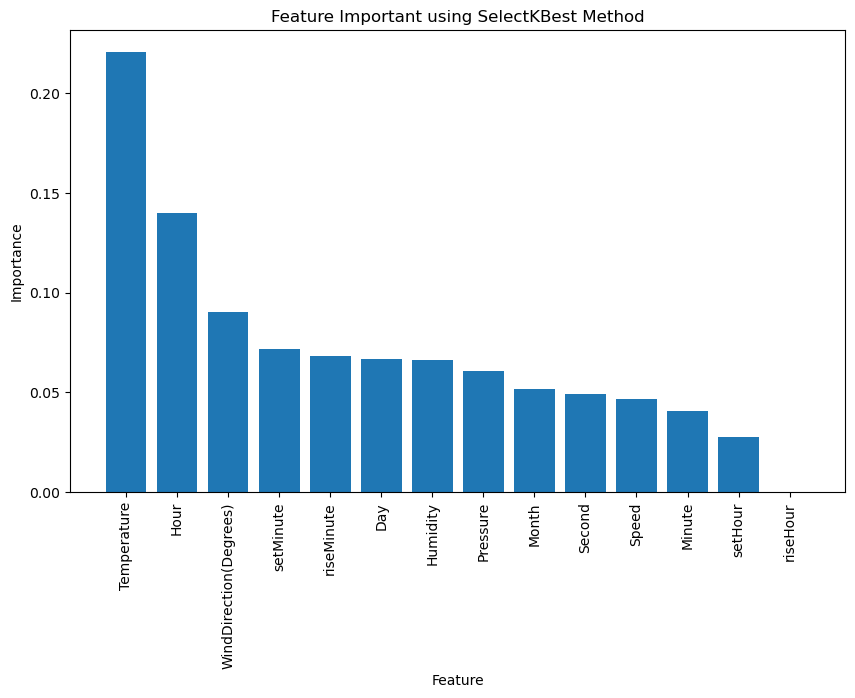

In [34]:
plt.figure(figsize=(10,6))
plt.bar(feature_imp.index,feature_imp['feature_imp'])
plt.xticks(rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Important using SelectKBest Method')
plt.show()

### 7.Feature Engineering with BoxCox, Log, Min-Max and Standard transformation

In [36]:
feature_transform = ['Temperature','Pressure','Humidity','Speed','WindDirection(Degrees)']

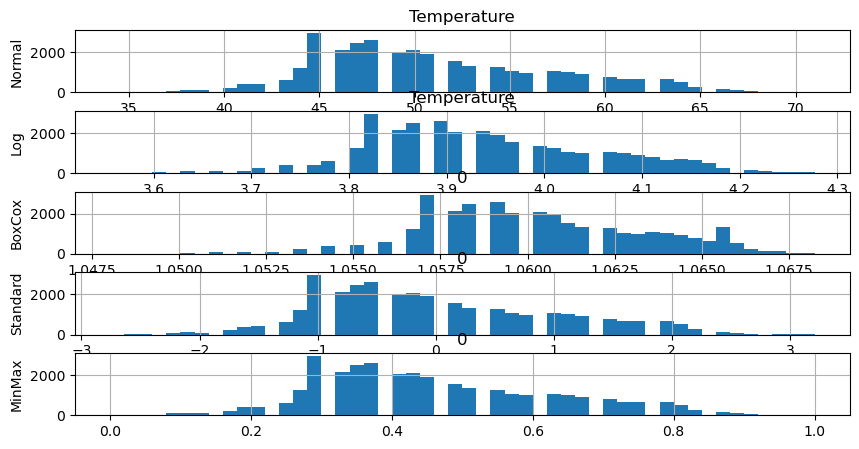

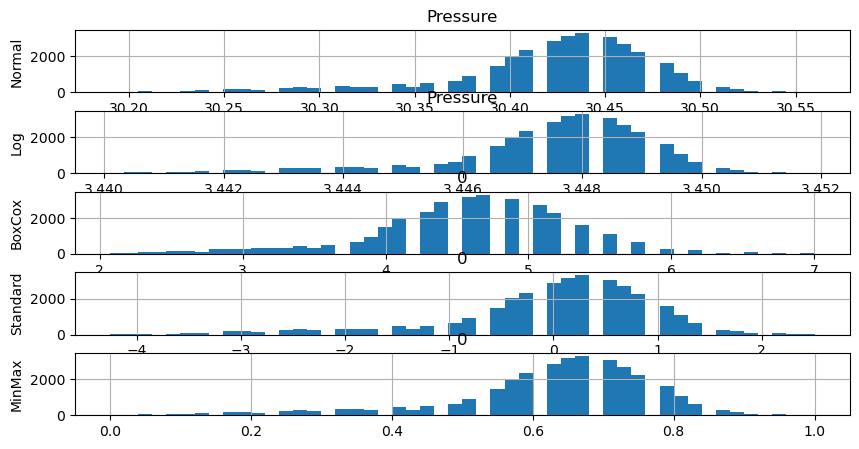

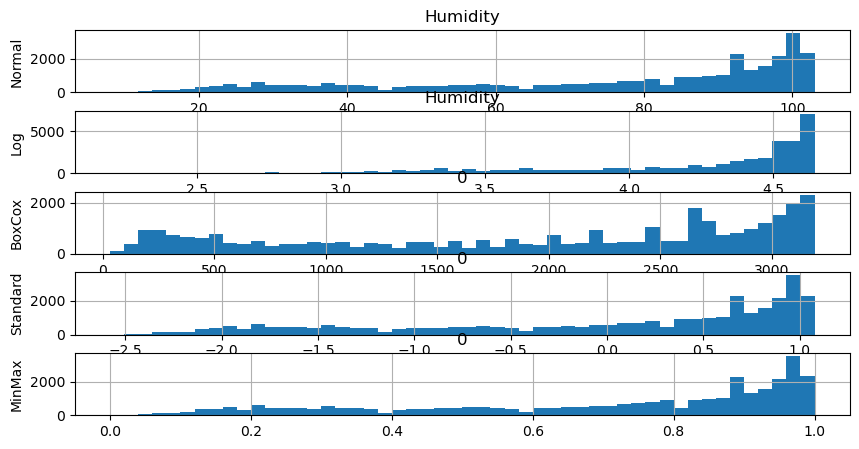

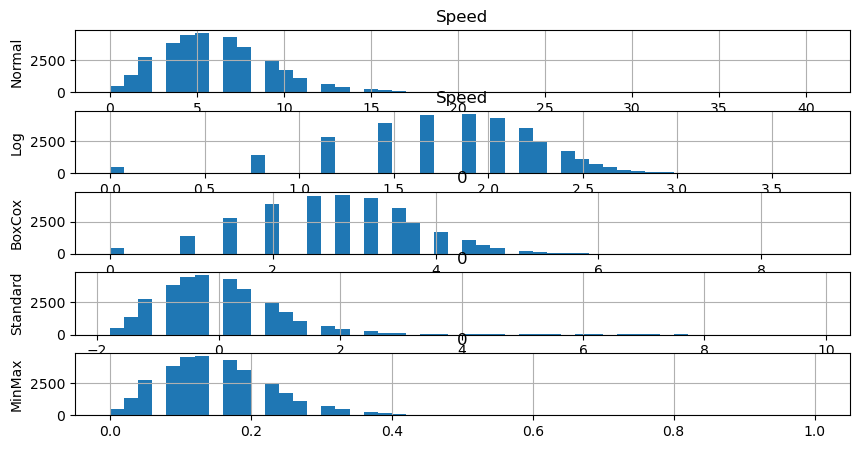

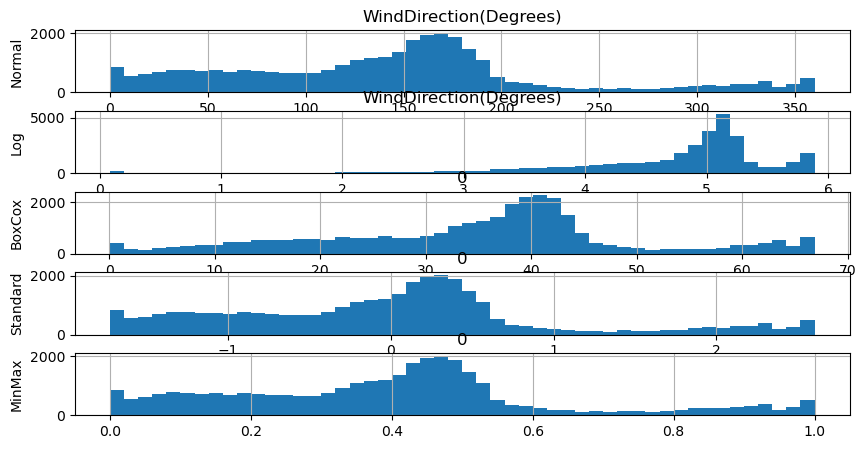

In [37]:
for i in feature_transform:
    fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(10,5))
    pd.DataFrame(input[i]).hist(ax=ax1,bins=50)
    pd.DataFrame((input[i]+1).transform(np.log)).hist(ax=ax2,bins=50)
    pd.DataFrame(stats.boxcox(input[i]+1)[0]).hist(ax=ax3,bins=50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(input[i]).reshape(-1,1))).hist(ax=ax4,bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(input[i]).reshape(-1,1))).hist(ax=ax5,bins=50)

    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('BoxCox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

    


In [70]:
transform = {'Temperature' : (input['Temperature']+1).transform(np.log), 
             'Pressure': stats.boxcox(input['Pressure']+1)[0], 
            'Humidity' : stats.boxcox(input['Humidity']+1)[0], 
            'Speed' : (input['Speed']+1).transform(np.log), 
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(input['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    input[i] = transform[i]

In [72]:
input.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,riseHour,riseMinute,setHour,setMinute
0,3.89182,5.044903e+152,1139.358665,0.492692,1.890095,9,29,23,55,26,6,13,18,13
1,3.89182,5.044903e+152,1104.046980,0.490996,1.474763,9,29,23,50,23,6,13,18,13
2,3.89182,5.044903e+152,1069.253545,0.440894,1.474763,9,29,23,45,26,6,13,18,13
3,3.89182,5.044903e+152,1175.187489,0.382426,1.474763,9,29,23,40,21,6,13,18,13
4,3.89182,5.044903e+152,1248.392213,0.291391,1.890095,9,29,23,35,24,6,13,18,13


### 8. Preparing data - Standardisation and Splitting



In [77]:
x_train, x_test, y_train, y_test = train_test_split(input,target,test_size=0.2,random_state=1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
print(x_train.shape)
print(x_test.shape)

(26148, 14)
(6538, 14)


### 9. Prediction with XGBoost

In [89]:
params ={'learning_rate':0.1,'max_depth':8}
model = XGBRegressor(**params)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [91]:
pred_value = model.predict(x_test)

In [95]:
rmse = np.sqrt(mean_squared_error(y_test,pred_value))
r2 = r2_score(y_test,pred_value)
print('Testing Performance')
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing Performance
RMSE: 81.87
R2: 0.93


### 10. Using MultiLayer Perceptron for prediction

In [104]:
model = None
model = Sequential()
    
model.add(Dense(128, activation='relu', input_dim=14))
model.add(Dropout(0.33))
    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))
    
model.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 161.2564 - mse: 93101.8125 - val_loss: 77.6918 - val_mse: 23234.2734
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 87.5501 - mse: 29018.0137 - val_loss: 69.4181 - val_mse: 18595.9785
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 81.6860 - mse: 25624.7871 - val_loss: 64.9151 - val_mse: 16481.9199
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 78.1987 - mse: 23978.1406 - val_loss: 60.9645 - val_mse: 14788.6855
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74.2830 - mse: 21390.0723 - val_loss: 59.2831 - val_mse: 14419.1738
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74.1999 - mse: 21666.8457 - val_loss: 55.6664 - val_mse: 12971.8467
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.1355 - mse: 19682.7559 - val_loss: 54.9658 - val_mse: 12940.3320
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.8717 - mse: 20150.0410 - val_loss:

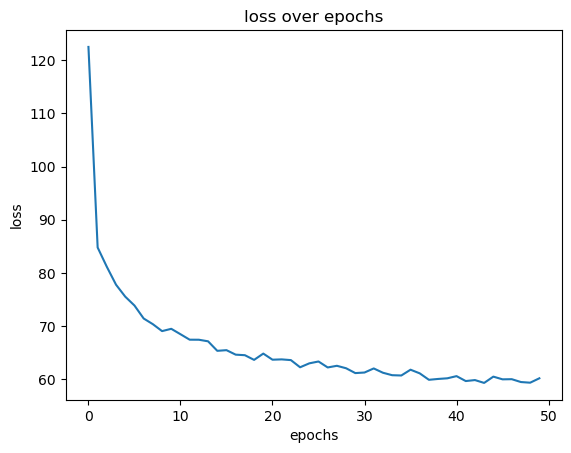

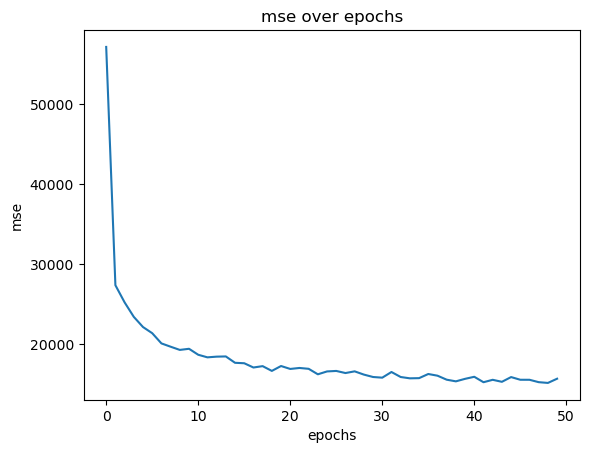

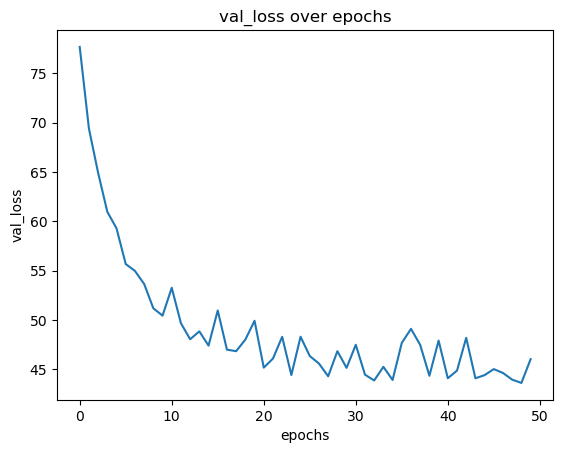

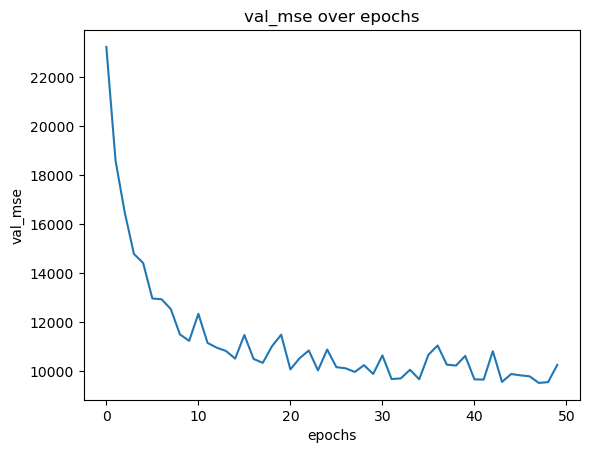

In [110]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=32)
fit = history.history
for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

In [112]:
scores = model.evaluate(x_test, y_test)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ', mae)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 45.9468 - mse: 10328.9502
Mean absolute error:  44.189903259277344
